### 풀링레이어, 드롭아웃레이어 추가해서 퍼포먼스 높히기

In [2]:
# Fashion MNIST 데이터셋 불러오기 및 정규화
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y),(test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255
test_X = test_X / 255

In [3]:
# before reshape
print(f"train_X의 shape : {train_X.shape}, test_X의 shape : {test_X.shape}")

# 데이터의 차원 맨 뒤에 채널 정보 추가(Fashion_MNIST 데이터셋의 이미지는 흑백이므로 1을 추가한다.)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 수행후의 데이터 shape 살펴보기
print(f"train_X의 shape : {train_X.shape}, test_X의 shape : {test_X.shape}")

train_X의 shape : (60000, 28, 28), test_X의 shape : (10000, 28, 28)
train_X의 shape : (60000, 28, 28, 1), test_X의 shape : (10000, 28, 28, 1)


In [4]:
# Google Colab GPU 사양 확인
!nvidia-smi

Sun Dec 11 13:09:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
# Fashion MNIST 분류 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [6]:
# Fashion MNIST 분류 컨볼루션 신경망 모델 학습 - 풀링 레이어, 드롭아웃 레이어 추가
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 16s 5ms/step - loss: 0.5295 - accuracy: 0.8086 - val_loss: 0.3658 - val_accuracy: 0.8645
Epoch 2/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3628 - accuracy: 0.8684 - val_loss: 0.3289 - val_accuracy: 0.8793
Epoch 3/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3204 - accuracy: 0.8821 - val_loss: 0.3158 - val_accuracy: 0.8847
Epoch 4/25
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2948 - accuracy: 0.8928 - val_loss: 0.2988 - val_accuracy: 0.8896
Epoch 5/25
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2720 - accuracy: 0.9013 - val_loss: 0.3074 - val_accuracy: 0.8912
Epoch 6/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2543 - accuracy: 0.9070 - val_loss: 0.2989 - val_accuracy: 0.8959
Epoch 7/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2398 - accuracy: 0.9131 - val_loss: 0.3130 - val_accuracy

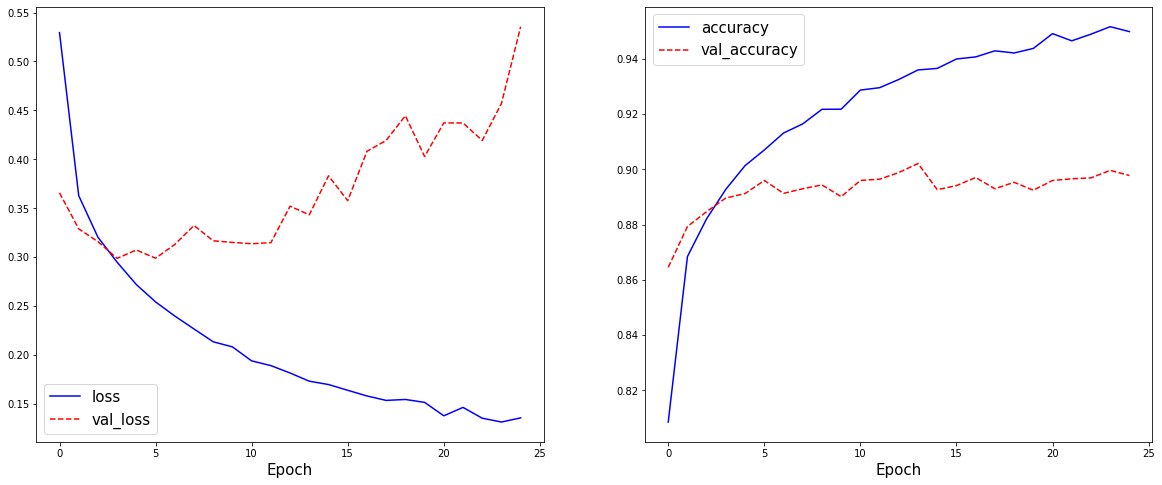

In [10]:
# Fashion MNIST 분류 컨볼루션 신경망 모델 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch', size=15)
plt.legend(fontsize=15)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch', size=15)
plt.legend(fontsize=15)

plt.show()


In [11]:
model.evaluate(test_X, test_Y, verbose=0)

[0.549071729183197, 0.8950999975204468]